In [127]:
import numpy as np

class parameters:
    def __init__(self):
        self.G = 1.0
        self.softener = 0.01
        
        self.timestep = 0.02
        self.num_points = 25
        self.num_steps = 25
        
        return

class body:
    def __init__(self, mass = 1.0, x = 0.0, y = 0.0, vx = 0.0, vy = 0.0):
        self.mass = mass
        self.x = y
        self.y = x
        self.vx = vx
        self.vy = vy
        self.ax = 0.0
        self.ay = 0.0
        
        return

class universe:
    def __init__(self, params):
        self.body_list = []
        
        return

    def create(self, params):
        
        for i in range(params.num_points):
            x = 0.5 * ((i % 5) - 2.0)   # np.random.uniform(-1.0,1.0)
            y = 0.5 * (int(i/5) - 2.0)  # np.random.uniform(-1.0,1.0)
            vx = np.random.uniform(-0.1,0.1)
            vy = np.random.uniform(-0.1,0.1)
            
            self.body_list.append(body(1.0, x, y, vx, vy))
            
        return
    
    def calculate_acceleration(self, params):
        
        for i in range(params.num_points):
            for j in range(i+1, params.num_points):
                
                x_diff = (self.body_list[i].x - self.body_list[j].x)
                y_diff = (self.body_list[i].y - self.body_list[j].y)
                
                dist = (x_diff**2 + y_diff**2)**0.5
                
                x_component = x_diff / dist
                y_component = y_diff / dist
                
                # F = GMm / r^2 
                force = params.G * self.body_list[i].mass * self.body_list[j].mass / ((dist**2) + params.softener)
                
                self.body_list[i].ax -= x_component * force / self.body_list[i].mass
                self.body_list[j].ax += x_component * force / self.body_list[j].mass
                self.body_list[i].ay -= y_component * force / self.body_list[i].mass
                self.body_list[j].ay += y_component * force / self.body_list[j].mass  
        
        return
            
    def move(self, params):
        
        for i in range(params.num_points):
            self.body_list[i].vx += self.body_list[i].ax * params.timestep
            self.body_list[i].vy += self.body_list[i].ay * params.timestep
            
            self.body_list[i].x += self.body_list[i].vx * params.timestep
            self.body_list[i].y += self.body_list[i].vy * params.timestep
            
            self.body_list[i].ax = 0.0
            self.body_list[i].ay = 0.0
        
        return

In [128]:
import matplotlib.pyplot as pyp

def plot_universe(snapshot, params):
    
    pyp.rcParams["figure.figsize"] = (15,15)
    
    fig, axs = pyp.subplots(5, 5, sharex = True, sharey = True, gridspec_kw={'hspace': 0, 'wspace': 0})
    
    
    for xframe in range(5):
        for yframe in range(5):
            frame = yframe + (xframe * 5)
            
            for point in range(params.num_points):
                axs[xframe, yframe].plot(snapshot[frame][point].x, snapshot[frame][point].y, 'o')
                axs[xframe, yframe].text(-1, 1, f"{frame + 1}")
                pyp.xlim([-1.25, 1.25])
                pyp.ylim([-1.25, 1.25])

    
    pyp.show()
    
    return

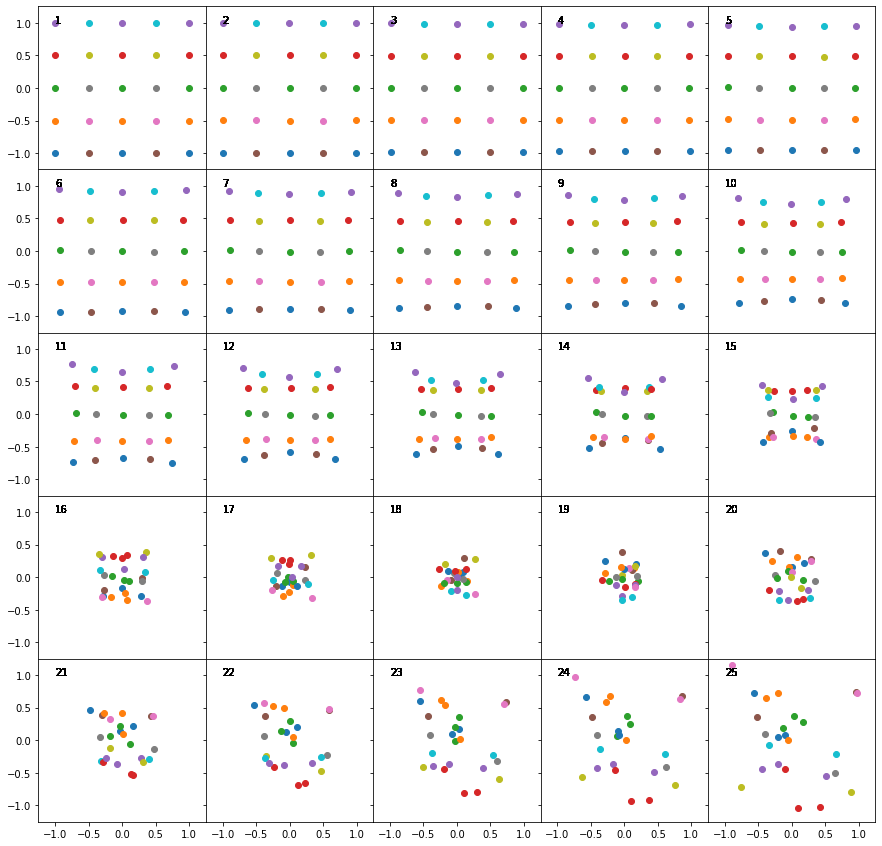

In [129]:
import copy

params = parameters()
my_universe = universe(params)
my_universe.create(params)
snapshot = [copy.deepcopy(my_universe.body_list)]

foo = copy.deepcopy(my_universe.body_list)

for i in range(params.num_steps):
    my_universe.calculate_acceleration(params)
    my_universe.move(params)
    
    snapshot.append(copy.deepcopy(my_universe.body_list))
    
plot_universe(snapshot, params)